In [1]:
%pip install seaborn

In [2]:
%pip install plotly

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load dataset
df = pd.read_csv("Unemployment_Rate_upto_11_2020.xls")

# Display first 5 rows
print(df.head())


Matplotlib is building the font cache; this may take a moment.


           Region         Date  Frequency  Estimated Unemployed  \
0  Andhra Pradesh   31-01-2020          M                  5.48   
1  Andhra Pradesh   29-02-2020          M                  5.83   
2  Andhra Pradesh   31-03-2020          M                  5.79   
3  Andhra Pradesh   30-04-2020          M                 20.51   
4  Andhra Pradesh   31-05-2020          M                 17.43   

    Estimated Employed   Estimated Labour Participation Rate Region.1  \
0             16635535                                 41.02    South   
1             16545652                                 40.90    South   
2             15881197                                 39.18    South   
3             11336911                                 33.10    South   
4             12988845                                 36.46    South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129     79.74  
2    15.9129     79.74  
3    15.9129     79.74  
4    15.9129     79.74  


In [4]:
# Remove spaces from column names
df.columns = df.columns.str.strip()

# Print cleaned column names
print(df.columns)


Index(['Region', 'Date', 'Frequency', 'Estimated Unemployed',
       'Estimated Employed', 'Estimated Labour Participation Rate', 'Region.1',
       'longitude', 'latitude'],
      dtype='object')


In [5]:
# Check dataset info
print(df.info())

# Summary statistics
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Region                               267 non-null    object 
 1   Date                                 267 non-null    object 
 2   Frequency                            267 non-null    object 
 3   Estimated Unemployed                 267 non-null    float64
 4   Estimated Employed                   267 non-null    int64  
 5   Estimated Labour Participation Rate  267 non-null    float64
 6   Region.1                             267 non-null    object 
 7   longitude                            267 non-null    float64
 8   latitude                             267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 14.7+ KB
None
       Estimated Unemployed  Estimated Employed  \
count            267.000000        2.670000e+02   


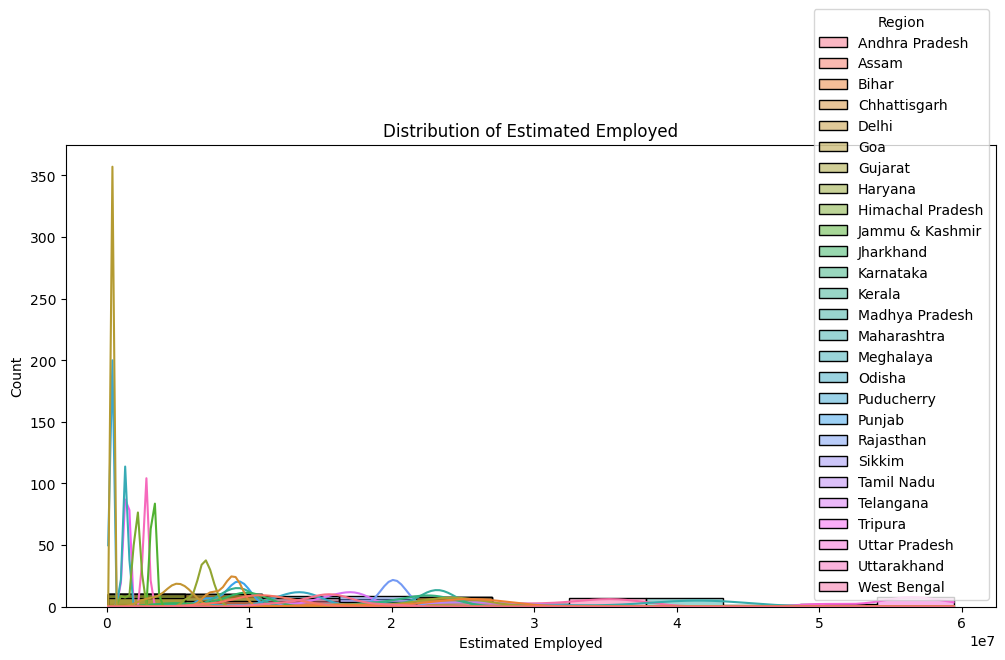

In [6]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="Estimated Employed", hue="Region", kde=True)
plt.title("Distribution of Estimated Employed")
plt.show()


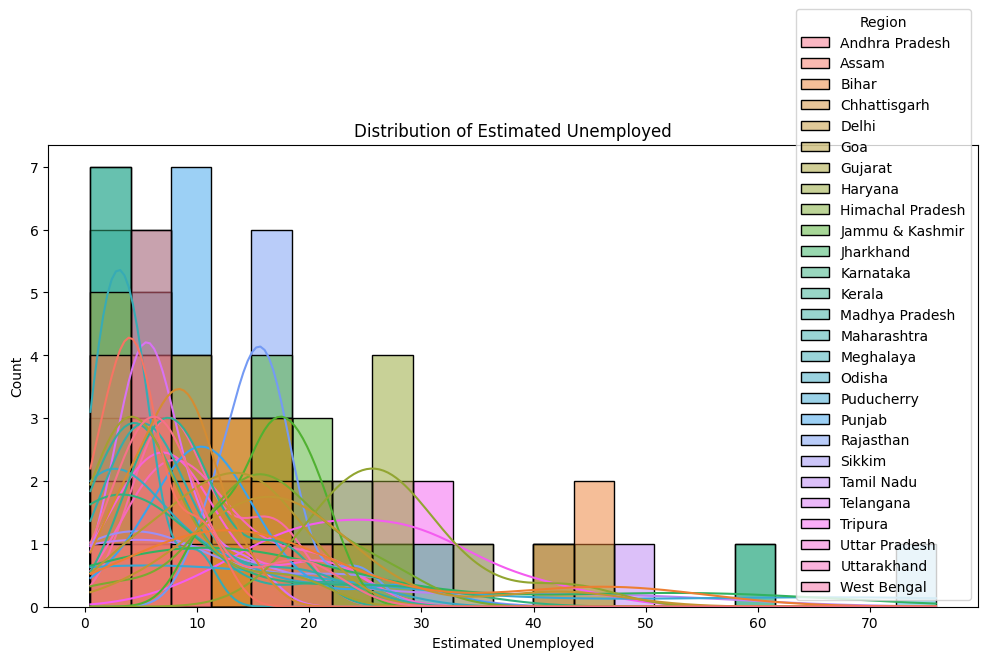

In [7]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="Estimated Unemployed", hue="Region", kde=True)
plt.title("Distribution of Estimated Unemployed")
plt.show()


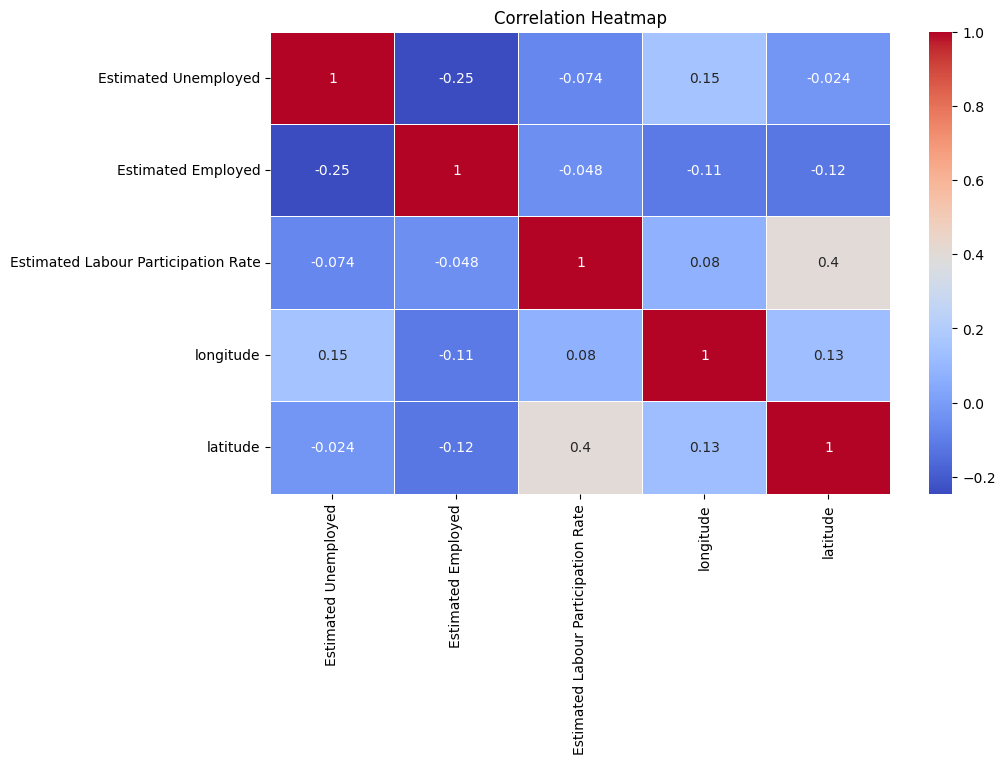

In [8]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()



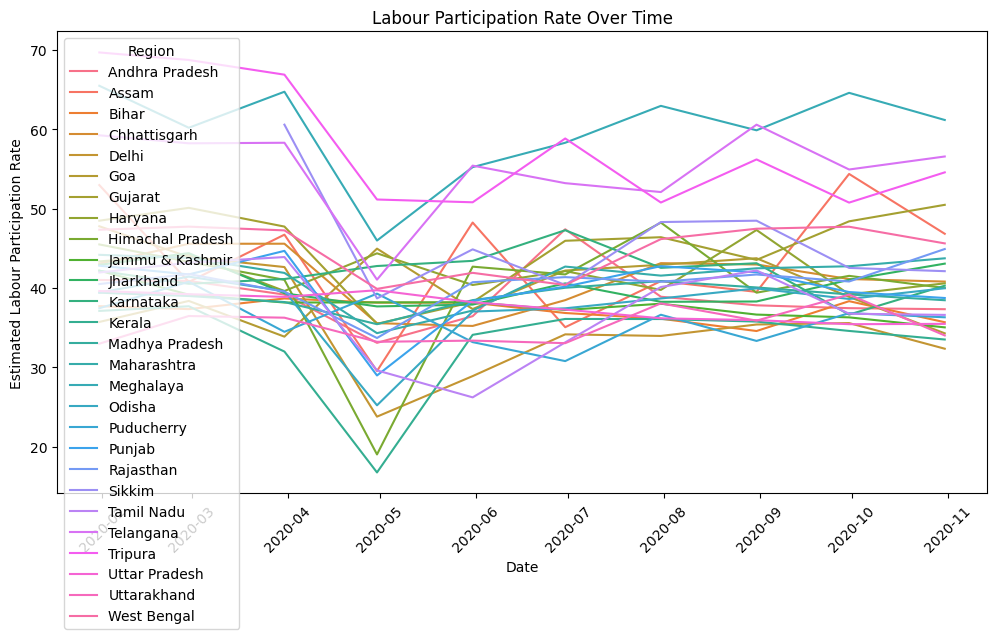

In [9]:
# Convert Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)



plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Date", y="Estimated Labour Participation Rate", hue="Region")
plt.title("Labour Participation Rate Over Time")
plt.xticks(rotation=45)
plt.show()


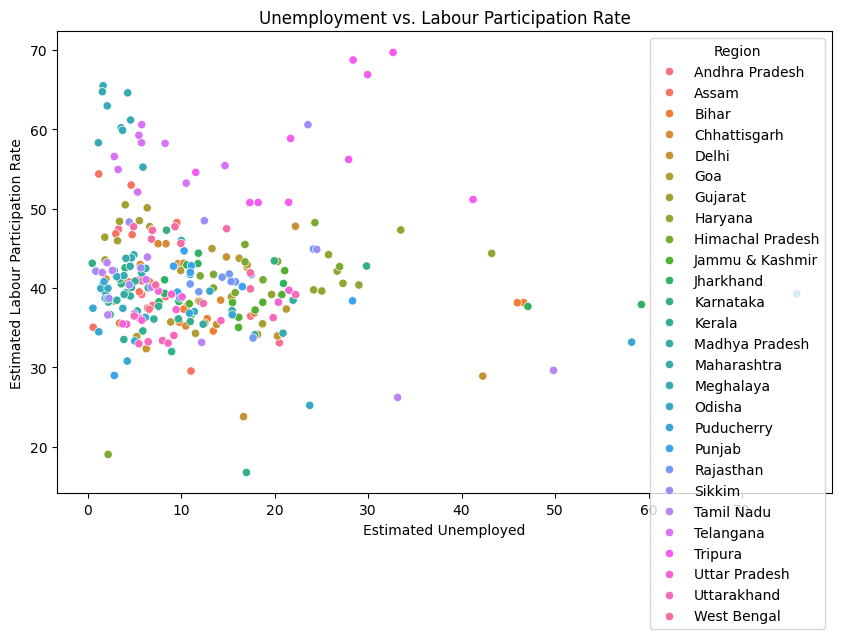

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Estimated Unemployed", y="Estimated Labour Participation Rate", hue="Region")
plt.title("Unemployment vs. Labour Participation Rate")
plt.show()


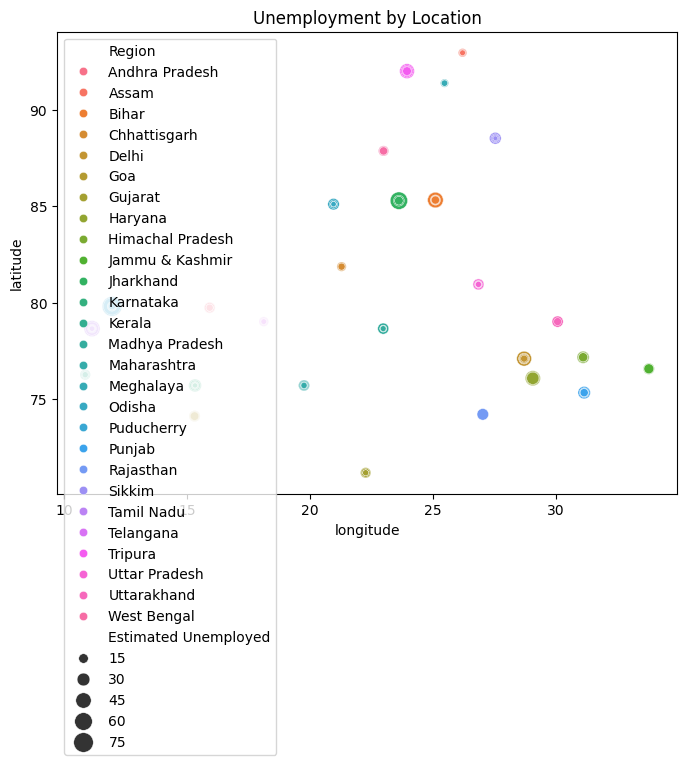

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="longitude", y="latitude", hue="Region", size="Estimated Unemployed", sizes=(10, 200))
plt.title("Unemployment by Location")
plt.show()
